# Mechanisms of Action (MoA) Prediction Project: 
#### Data Source: https://www.kaggle.com/competitions/lish-moa/overview/description
#### Code Generated By: Mark D. Espinoza
-----

## Introduction

![picture 3](../images/21ad447f2d79344afabc719d92e5f9c98d6b025703213f3d3b8e65313116fbdf.png)

> Image 1: Women holding a drug with the appearance of analyzing it visually. 

Scientist are consistently working on creating new drug products, but the process of developing new drugs has significantly improved with the advent of new and more powerful technologies. Drug discovery has changed in that it is approached to target specific mechanism of a disease. Which is to identify a protein target associated with a disease and then develop a drug that is able to modulate the protein, thus reducing or eliminating the disease. 

Scientist describe the activity of a drug as mechanism-of-action, which entails the overall outcome the drug has on the targeted protein and other types of cells. 


### How Scientist determine the MOA of a drug? 

Treat human cells with a drug and the monitor and analyze the cellular responses with algorithms that search for similar patterns on large genomic databases. 

### Dataset Description

The dataset is a combination of gene expression and cell viability data. The data is from a new technology that measures simultaneously human cells' responses to drugs in a pool of 100 different cell types. Also the data has annotations for more than 5,000 drugs in that dataset. 

>Note: The data data is already split into training and testing subsets. Also, the goal is define the drug/molecule into one or more MOA classes ("multi-label classification problem")


### Objectives for this project

- The aim of this project is to develop and fit the best model for the predication of the best response to a specific target (gene expression and cell viability).

Other Questions/Insights from the data:
- What is the overall biological activity of a given molecule/drug? (Does it impact other cell type?)
- Are there any cell types that are always affected?
- Are there drugs that are intended for a specific cell type but have equal or greater effects on other cell types?


sources: 
- https://www.kaggle.com/competitions/lish-moa/overview/description

---
author:{Jin Paik, Maggie, mrbhbs, Steven Randazzo , tnat1031},
title:{Mechanisms of Action (MoA) Prediction},
publisher:{Kaggle},
year:{2020},
url:{https://kaggle.com/competitions/lish-moa}


---

## Literature Review:

![picture 4](../images/9461f0d4f4cfe03e5a435fd024a6aa9447ca6a1166d7f47f647e8d03479b37a0.png)

> Image 2: First - Publication regarding drug modeling: Multiscale modelling of drug mechanism and safety

Summary of the Article: 
A drug discovery program is setup to maximize the full knowledge of a molecule prior to every being tested/given to a human. There is a full understanding of a new drug in vitro and in vivo. There are many factors that are studied beyond just the MOA of a drug such as Negative Feedback regulation of a specific target. Additionally it is noted that drugs may have interactions with multiple targets, with varying affinities (affinity is related on how a molecule reaction/interaction/acceptance).
Modern drug discovery programs focus on targeting specific targets which have lead to the following examples of specific domains in drug development: 
1. Structure-based molecular modeling 
2. Ligand Based molecular modeling 
3. Modeling with omnics data


In summary drug development is increasingly becoming more multiscale modeling combining models from the initial determination of a target to the overall effect it has on a population. 




![picture 7](../images/67f626c53eca37b85b4af52e543b51287d938facd72e89086d12841e8c5d7a32.png)  

> Image 3: Second - Publication: Modeling drug mechanism of action with large scale gene‐expression profiles using GPAR, an artificial intelligence platform

Summary of the Article: 
With the advent of large drug-induced gene expression profiles machine learning/predictive modeling methods is an effective methods for discovering the MOA of drugs. However there is a lack of adoption by people since there is a lack in open source platforms/code and user friendly platforms. Overall they developed a GPAR method and online tool to connect MOA with gene expression signatures, providing a simple and effective deep learning-based modeling and prediction method for drug researchers. 

![picture 8](../images/f7e9c889247abf4cb83a93b9b86202e1256fc598800ca58976246ec01d28f5fc.png)  

> Image 4: Third - Publication: Mechanism-Based Pharmacodynamic Modeling

Summary of the Article: 
The modeling of drug development is promising and many of the modeling methods described in the article will be the start of more complex models. 
Types of Models Mentioned: 
- Simple Direct Effective Models: (Hill Equation: Represents a fundamental pharmacodynamic relationship)
- Biophase Distribution: In reference to plasma drug concentrations and time to reach target and the onset of side-effects
- Indirect Response Models: Reversible drug receptor interactions serve to alter the natural production or loss of biomarker response variables 
- and more... 

## Methods: 

## Results:

## Discussion: 

## Appendix

### Python Source Code

In [1]:
import pandas as pd
import numpy as np
import os
import re
import math
import time
from varclushi import VarClusHi
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
import random
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None

##### Import Data and view the dataframes


- train_features.csv - Features for the training set. Features g- signify gene expression data, and c- signify cell viability data. cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs; cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low).
- train_drug.csv - This file contains an anonymous drug_id for the training set only.
- train_targets_scored.csv - The binary MoA targets that are scored.
- train_targets_nonscored.csv - Additional (optional) binary MoA responses for the training data. These are not predicted nor scored.
- test_features.csv - Features for the test data. You must predict the probability of each scored MoA for each row in the test data.

In [2]:
#import both the data
train_features = pd.read_csv("/Users/mdespinoza/Desktop/Github/data/train_features.csv")
test_features = pd.read_csv("/Users/mdespinoza/Desktop/Github/data/test_features.csv")
train_drug = pd.read_csv("/Users/mdespinoza/Desktop/Github/data/train_drug.csv")
train_targets_nonscored = pd.read_csv("/Users/mdespinoza/Desktop/Github/data/train_targets_nonscored.csv")
train_targets_scored = pd.read_csv("/Users/mdespinoza/Desktop/Github/data/train_targets_scored.csv")
f=train_features.merge(train_drug, how='left', on='sig_id')

merged=pd.concat([train_features,test_features])

#Datasets for treated and control experiments
treated= train_features[train_features['cp_type']=='trt_cp']
control= train_features[train_features['cp_type']=='ctl_vehicle']

#Datasets for treated and control: TEST SET
treated_t= test_features[test_features['cp_type']=='trt_cp']
control_t= test_features[test_features['cp_type']=='ctl_vehicle']

#Treatment time datasets
cp24= train_features[train_features['cp_time']== 24]
cp48= train_features[train_features['cp_time']== 48]
cp72= train_features[train_features['cp_time']== 72]

#Merge scored and nonscored labels
all_drugs= pd.merge(train_targets_scored, train_targets_nonscored, on='sig_id', how='inner')

#Treated drugs without control
treated_list = treated['sig_id'].to_list()
drugs_tr= train_targets_scored[train_targets_scored['sig_id'].isin(treated_list)]

#Select the columns c-
c_cols3 = [col for col in test_features.columns if 'c-' in col]
#Filter the TEST set
cells3=treated[c_cols3]


#view that all the data is there by seeing the shape 
print(train_features.shape)
print(test_features.shape)
print(train_drug.shape)
print(train_targets_nonscored.shape)
print(train_targets_scored.shape)

(23814, 876)
(3982, 876)
(23814, 2)
(23814, 403)
(23814, 207)


In [3]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [4]:
test_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [5]:
train_drug.head()

,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131


In [6]:
train_targets_nonscored.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,aldehyde_dehydrogenase_activator,aldose_reductase_inhibitor,alpha_mannosidase_inhibitor,ampk_inhibitor,androgen_biosynthesis_inhibitor,angiotensin_receptor_agonist,antacid,anthelmintic,antihypertensive,antimetabolite,antipruritic,antirheumatic_drug,antiseptic,antispasmodic,antithyroid_agent,antitussive,anxiolytic,ap_inhibitor,apolipoprotein_expression_enhancer,apoptosis_inhibitor,arf_inhibitor,aryl_hydrocarbon_receptor_agonist,aryl_hydrocarbon_receptor_antagonist,aspartic_protease_inhibitor,atherogenesis_inhibitor,atherosclerosis_formation_inhibitor,atp-sensitive_potassium_channel_agonist,atp-sensitive_potassium_channel_inhibitor,atp_channel_activator,atp_channel_blocker,atp_citrase_lyase_inhibitor,autophagy_inducer,axl_kinase_inhibitor,bacterial_atpase_inhibitor,bacterial_permeability_inducer,bacterial_protein_synthesis_inhibitor,benzodiazepine_receptor_antagonist,beta_catenin_inhibitor,beta_lactamase_inhibitor,beta_secretase_inhibitor,big1_inhibitor,bile_acid,biliverdin_reductase_a_activator,bone_resorption_inhibitor,botulin_neurotoxin_inhibitor,bradykinin_receptor_antagonist,breast_cancer_resistance_protein_inhibitor,bronchodilator,calcitonin_antagonist,calcium_channel_activator,calmodulin_inhibitor,calpain_inhibitor,camp_stimulant,capillary_stabilizing_agent,car_agonist,car_antagonist,carboxylesterase_inhibitor,carcinogen,cardiac_glycoside,carnitine_palmitoyltransferase_inhibitor,caspase_inhibitor,cathepsin_inhibitor,cc_chemokine_receptor_agonist,cdc_inhibitor,cdk_expression_enhancer,cell_cycle_inhibitor,cell_proliferation_inhibitor,ceramidase_inhibitor,cftr_channel_agonist,cftr_channel_antagonist,chitin_inhibitor,chloride_channel_activator,choleretic_agent,cholinergic_receptor_agonist,cholinesterase_inhibitor,clk_inhibitor,coenzyme_a_precursor,collagenase_inhibitor,collapsin_response_mediator_protein_stimulant,coloring_agent,complement_antagonist,complement_inhibitor,contraceptive_agent,contrast_agent,corticosteroid_antagonist,cyclin_d_inhibitor,cysteine_peptidase_inhibitor,cytidine_deaminase_inhibitor,cytokine_production_inhibitor,dehydrogenase_inhibitor,deubiquitinase_inhibitor,diacylglycerol_kinase_inhibitor,diacylglycerol_o_acyltransferase_inhibitor,differentiation_inducer,dihydroorotate_dehydrogenase_inhibitor,dihydropteroate_synthase_inhibitor,dihydropyrimidine_dehydrogenase_inhibitor,dna_dependent_protein_kinase_inhibitor,dna_methyltransferase_inhibitor,dna_polymerase_inhibitor,dna_repair_enzyme_inhibitor,dna_synthesis_inhibitor,dopamine_release_enhancer,dot1l_inhibitor,dynamin_inhibitor,dyrk_inhibitor,dystrophin_stimulant,endothelin_receptor_antagonist,enkephalinase_inhibitor,ephrin_inhibitor,epoxide_hydolase_inhibitor,etv1_inhibitor,eukaryotic_translation_initiation_factor_inhibitor,exportin_antagonist,fabi_inhibitor,farnesyl_pyrophosphate_synthase_inhibitor,fatty_acid_receptor_antagonist,fatty_acid_synthase_inhibitor,folate_receptor_ligand,free_fatty_acid_receptor_agonist,"fungal_1,3-beta-d-glucan_synthase_inhibitor",fungal_ergosterol_inhibitor,fungal_lanosterol_demethylase_inhibitor,fxr_agonist,fxr_antagonist,g_protein-coupled_receptor_agonist,g_protein-coupled_receptor_antagonist,g_protein_signaling_inhibitor,gaba_gated_chloride_channel_blocker,gaba_receptor_modulator,gaba_uptake_inhibitor,gap_junction_modulator,gastrin_inhibitor,gat_inhibitor,glcnac_phosphotransferase_inhibitor,gli_antagonist,glp_receptor_agonist,glucagon_receptor_antagonist,glucocorticoid_receptor_antagonist,glucokinase_activator,glucokinase_inhibitor,gluconeogenesis_inhibitor,glucose_dependent_insulinotropic_receptor_agonist,glucosidase_inhibitor,glutamate_receptor_modulator,glutathione_peroxidase_agonist,glutathione_reductase_(nadph)_activators,glutathione_transferase_inhibitor,glycine_receptor_antagonist,glyci

In [7]:
train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhib

##### Visualizations of training dataset

##### Treatment distribution

In [8]:
treatment_group = train_features.groupby(['cp_type'])['sig_id'].count().reset_index()

treatment_group.columns = [
    'cp_type',  
    'count'
]

bar_plot_cp_type = px.bar(
    treatment_group, 
    x='cp_type', 
    y="count", 
    barmode='group',
    orientation='v', 
    title='cp_type',
    text_auto='.2s'
)
bar_plot_cp_type.update_layout(title_x=0.5)

bar_plot_cp_type.show()

> Distribution of treatment type - which is not balanced. Note there are few controls in contrast to treated. 

##### Dose distribution

In [9]:
time_group = train_features.groupby(['cp_time'])['sig_id'].count().reset_index()

time_group.columns = [
    'cp_time', 
    'count'
]

time_plot = px.bar(
    time_group, 
    x='cp_time', 
    y="count",
    orientation='v',
    title='cp_time',
    text_auto='.2s'
)

time_plot.update_layout(title_x=0.5)

time_plot.show()

> Time distribution of when drugs were provided and it is distributed more evenly. 

/Users/mdespinoza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



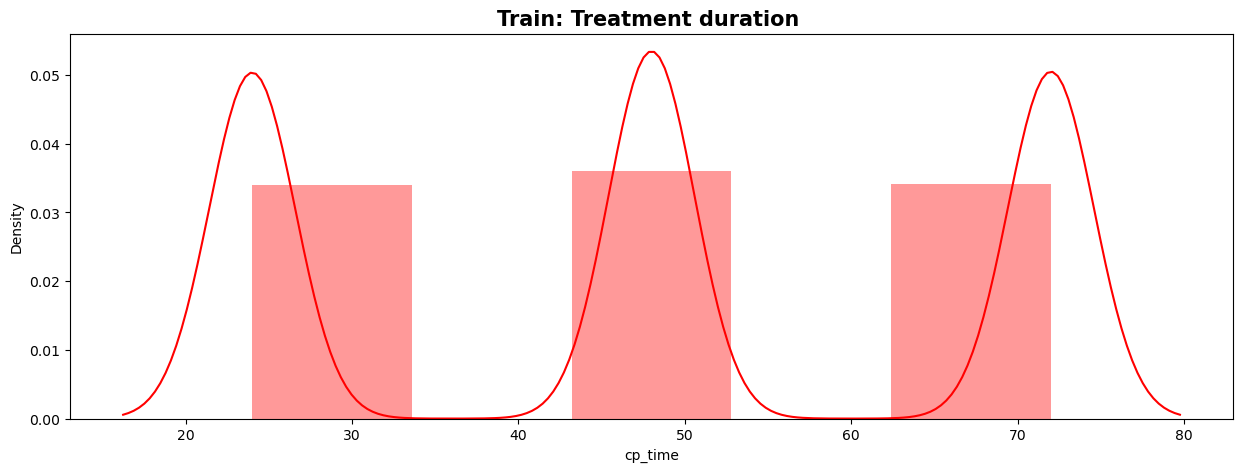

In [10]:
plt.figure(figsize=(15,5))
sns.distplot( train_features['cp_time'], color='red', bins=5)
plt.title("Train: Treatment duration ", fontsize=15, weight='bold')
plt.show()

> Plot showing the time distribution of when drugs were given

##### Duration distribution

In [11]:
dose_group = train_features.groupby(['cp_dose'])['sig_id'].count().reset_index()

dose_group.columns = [
    'cp_dose', 
    'count'
]

does_plot = px.bar(
    dose_group, 
    x='cp_dose', 
    y="count",
    orientation='v',
    title='cp_dose',
    text_auto='.2s'
)

does_plot.update_layout(title_x=0.5)

does_plot.show()

> The does distribution of low versus high even. 

#### Cell Viability
Cell Viability is defined as the number of healthy cells in a sample and proliferation of cells is a vital indicator for understanding the mechanisms in action of certain genes, proteins and pathways involved cell survival or death after exposing to toxic agents. 

sources: 
1. https://pubmed.ncbi.nlm.nih.gov/27604355/

In [21]:
def plotf(f1, f2, f3, f4):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')

    fig= plt.figure(figsize=(15,10))
    #2 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((2,2),(0,0))
    sns.distplot(train_features[f1], color='crimson')
    plt.title(f1,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #first row sec col
    ax1 = plt.subplot2grid((2,2), (0, 1))
    sns.distplot(train_features[f2], color='gainsboro')
    plt.title(f2,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #Second row first column
    ax1 = plt.subplot2grid((2,2), (1, 0))
    sns.distplot(train_features[f3], color='deepskyblue')
    plt.title(f3,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    #second row second column
    ax1 = plt.subplot2grid((2,2), (1, 1))
    sns.distplot(train_features[f4], color='black')
    plt.title(f4,weight='bold', fontsize=18)
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    return plt.show()


def plotd(f1):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.hist(control[f1], bins=4, color='mediumpurple',alpha=0.5)
    plt.title(f'control: {f1}',weight='bold', fontsize=18)
    #first row sec col
    ax1 = plt.subplot2grid((1,2),(0,1))
    plt.hist(treated[f1], bins=4, color='darkcyan',alpha=0.5)
    plt.title(f'Treated with drugs: {f1}',weight='bold', fontsize=18)
    plt.show()
    
def plott(f1):
    plt.style.use('seaborn')
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(15,5))
    #1 rows 2 cols
    #first row, first col
    ax1 = plt.subplot2grid((1,3),(0,0))
    plt.hist(cp24[f1], bins=3, color='deepskyblue',alpha=0.5)
    plt.title(f'Treatment duration 24h: {f1}',weight='bold', fontsize=14)
    #first row sec col
    ax1 = plt.subplot2grid((1,3),(0,1))
    plt.hist(cp48[f1], bins=3, color='lightgreen',alpha=0.5)
    plt.title(f'Treatment duration 48h: {f1}',weight='bold', fontsize=14)
    #first row 3rd column
    ax1 = plt.subplot2grid((1,3),(0,2))
    plt.hist(cp72[f1], bins=3, color='gold',alpha=0.5)
    plt.title(f'Treatment duration 72h: {f1}',weight='bold', fontsize=14)
    plt.show()



# corrs function: Show dataframe of high correlation between features
def corrs(data, col1='Gene 1', col2='Gene 2',rows=5,thresh=0.8, pos=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53]):
        #Correlation between genes
        corre= data.corr()
         #Unstack the dataframe
        s = corre.unstack()
        so = s.sort_values(kind="quicksort", ascending=False)
        #Create new dataframe
        so2= pd.DataFrame(so).reset_index()
        so2= so2.rename(columns={0: 'correlation', 'level_0':col1, 'level_1': col2})
        #Filter out the coef 1 correlation between the same drugs
        so2= so2[so2['correlation'] != 1]
        #Drop pair duplicates
        so2= so2.reset_index()
        pos = pos
        so3= so2.drop(so2.index[pos])
        so3= so3.drop('index', axis=1)
        #Show the first 10 high correlations
        cm = sns.light_palette("Red", as_cmap=True)
        s = so3.head(rows).style.background_gradient(cmap=cm)
        print(f"{len(so2[so2['correlation']>thresh])/2} {col1} pairs have +{thresh} correlation.")
        return s


/Users/mdespinoza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mdespinoza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mdespinoza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for 

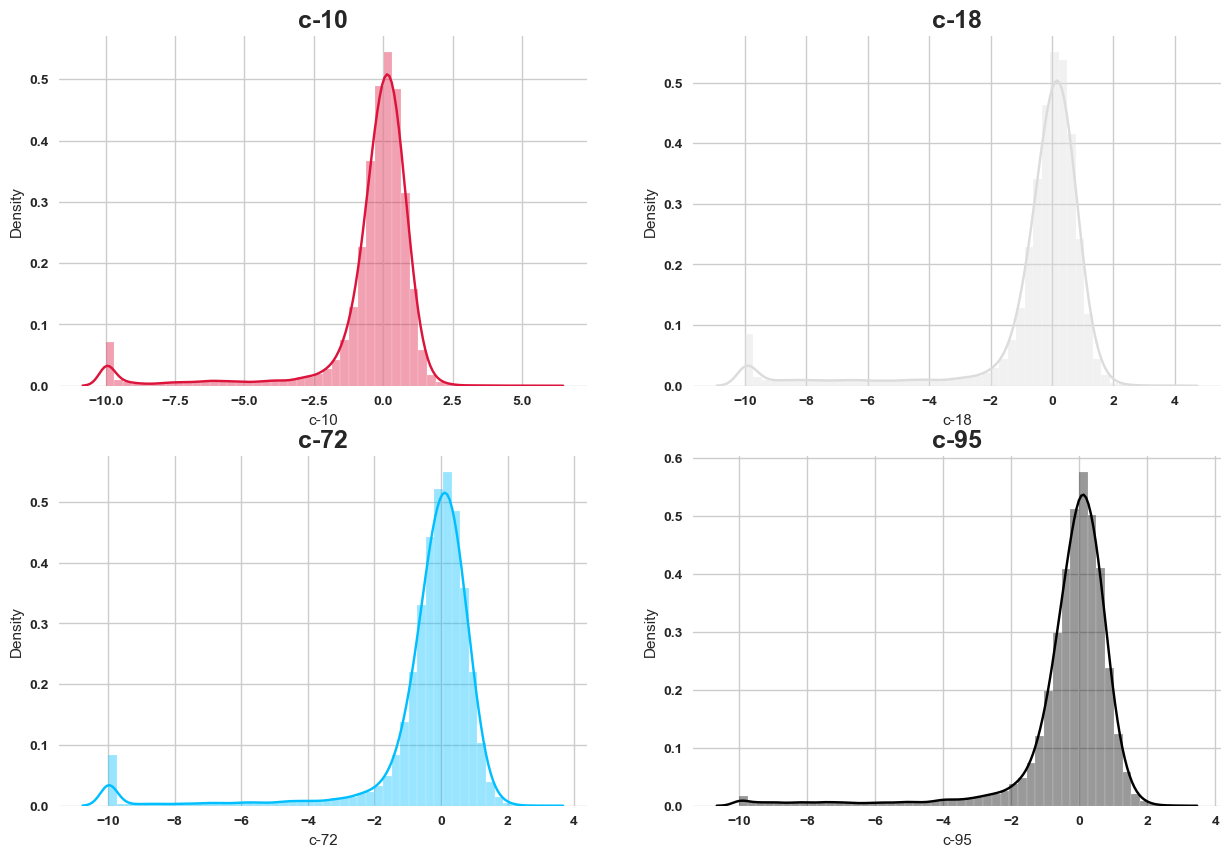

In [13]:
#plot the cell-viability
plotf('c-10', 'c-18', 'c-72', 'c-95')

> Cell viability is graphed but note that is the value is more positive then that is an indication of a thriving/living cell, while negative means that the cells are dying/not well.
> If a cell is treated with a drug the expectation that the cell viability will decrease if it is the target cell.  

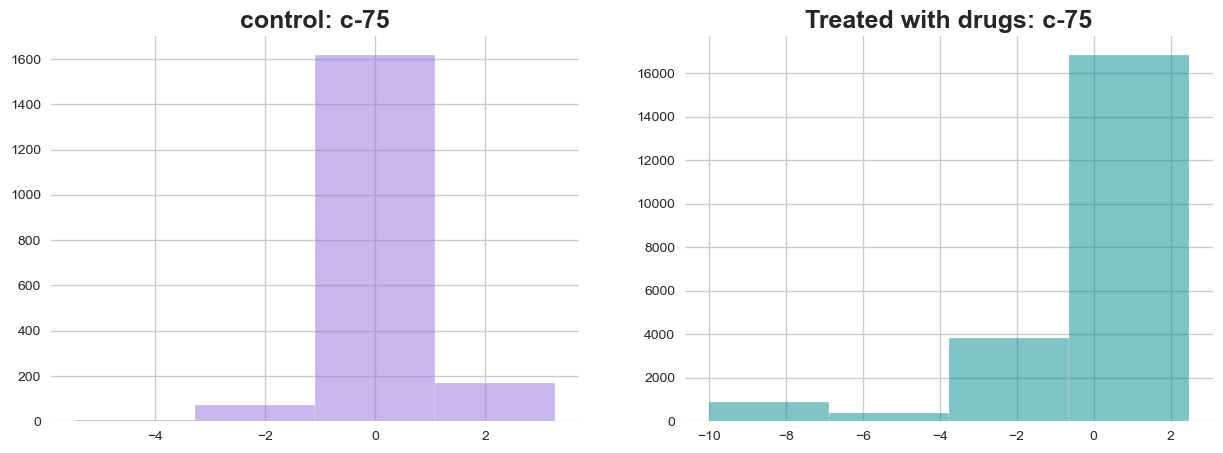

In [14]:
plotd("c-75")

> Difference in control versus treated. As noted the treated should be more negative if it is the target cell for the new drug.

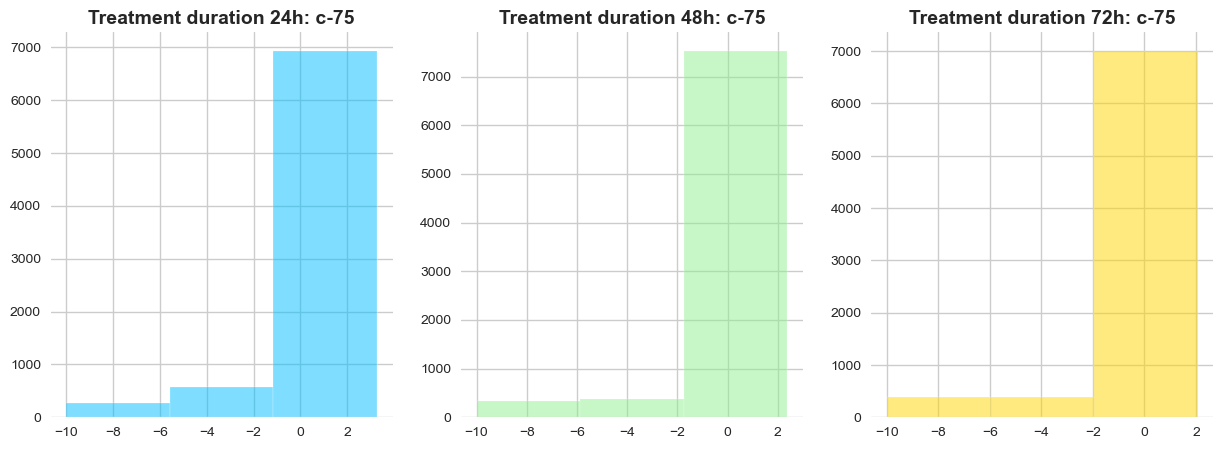

In [15]:
plott("c-75")

> These plot show the overall effect of the treatment on a cell from 24 hr - 72 hr.

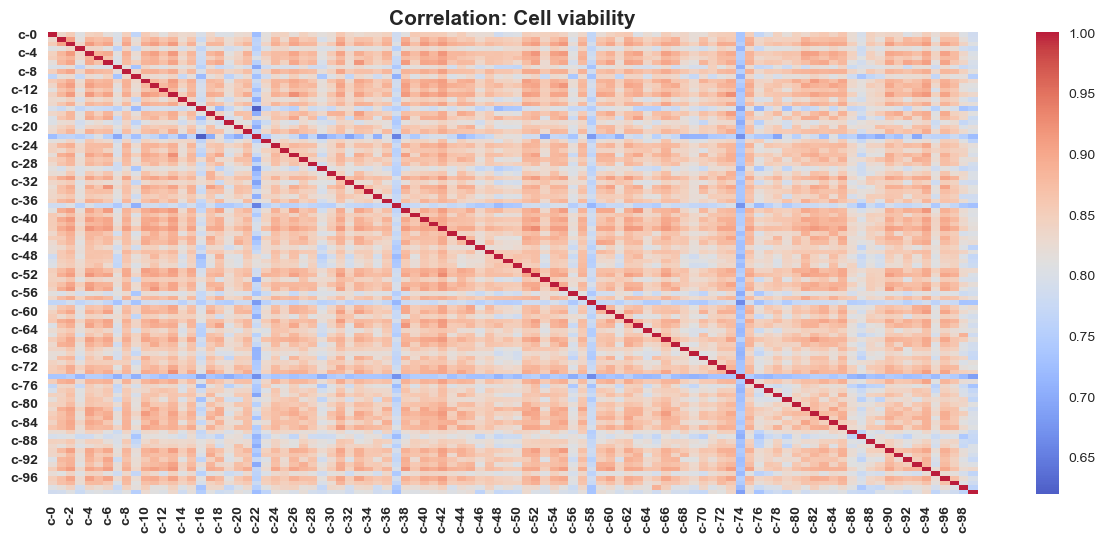

In [18]:
#Select the columns c-
c_cols = [col for col in train_features.columns if 'c-' in col]
#Filter the columns c-
cells=treated[c_cols]
#Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(cells.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Correlation: Cell viability', fontsize=15, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [22]:
corrs(cells, 'Cell', 'Cell 2', rows=7)

4187.0 Cell pairs have +0.8 correlation.


,Cell,Cell 2,correlation
0,c-42,c-52,0.927873
2,c-13,c-73,0.924338
4,c-13,c-26,0.924001
6,c-55,c-11,0.917963
8,c-6,c-33,0.917805
10,c-52,c-4,0.917748
12,c-63,c-38,0.917566


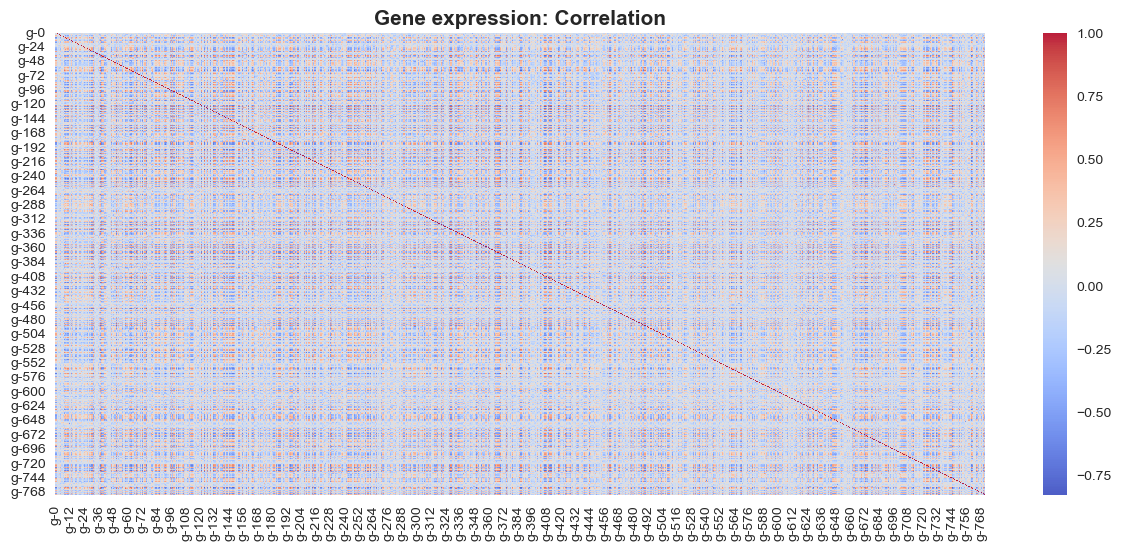

In [19]:
#Select the columns g-
g_cols = [col for col in train_features.columns if 'g-' in col]
#Filter the columns g-
genes=treated[g_cols]
#Plot heatmap
# plt.figure(figsize=(15,7))
plt.figure(figsize=(15,6))
sns.heatmap(genes.corr(), cmap='coolwarm', alpha=0.9)
plt.title('Gene expression: Correlation', fontsize=15, weight='bold')
plt.show()